## ANOVA Example: Price Difference Between Passenger Class
- `T-Test` specializes in comparing `two` populations
- `ANOVA (Analysis of Variance)` test will allow you to compare the influence of `three or more` populations.

Fair prices are `continuous numerical dependent variables`. They are influenced by the three passenger classes.

We'll install a new package:
```text
conda install statsmodels
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

# load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [2]:
# load your OLS model (Ordinary Least Square)
model = ols('Fare_decimal ~ C(Passenger_Class)', data = passengers_df).fit()
# ANOVA Table
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(<F) is` is your `P-value`

#### ANOVA Notation (R-Style Formulas):
- The `~` char separates the left side from the right side
- The `+` char adds a new separated column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies the both individual columns are combined

The string `Fare_decimal ~ C(Passenger_Class)` translates to:
- Fare decimal variable is affected by the categorical variable (`C`) Passenger Class

Conclusion-- there is some difference in price relative to the passenger class.

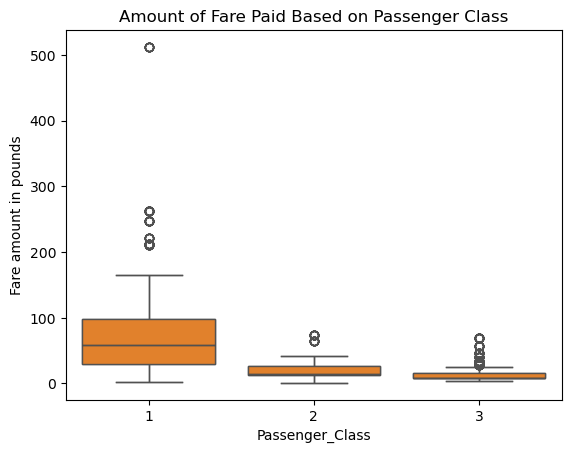

In [4]:
# Create a box plot of the fare paid by passenger class
sns.boxplot(y=passengers_df['Fare_decimal'], x=passengers_df['Passenger_Class'])
plt.ylabel('Fare amount in pounds')
plt.title('Amount of Fare Paid Based on Passenger Class')
plt.show()

Do a `post-hoc` test on this. For ANOVA we use the `Tukey HSD` test to compare each individual population from a statistically significant ANOVA.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
# drop unused cols
passengers_df.drop(columns=['Born', 'Died', 'Fare', 'Lived_Died', 'Name', 'Gender'], inplace=True)
passengers_df.dropna(inplace=True) # drop all NULLS

In [7]:
mc = MultiComparison(passengers_df['Fare_decimal'], passengers_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then the reject column will indicate `False`--that is, the `null-hypothetsis` cannot be rejected.